In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from datetime import datetime

In [40]:
%pip install Faker

  Obtaining dependency information for Faker from https://files.pythonhosted.org/packages/c8/3d/ed83cf090e31f5ef4d191a2e25500fc65281fb46d45f0cc224fd0f48b435/Faker-24.0.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.8 MB 3.2 MB/s eta 0:00:01
   ---- ----------------------------------- 0.2/1.8 MB 3.1 MB/s eta 0:00:01
   -------- ------------------------------- 0.4/1.8 MB 3.2 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.8 MB 3.1 MB/s eta 0:00:01
   -------------- ------------------------- 0.6/1.8 MB 3.1 MB/s eta 0:00:01
   ----------------- ---------------------- 0.8/1.8 MB 3.1 MB/s eta 0:00:01
   -------------------- ------------------- 0.9/1.8 MB 3.1 MB/s eta 0:00:01
   ------------------------ --------------- 1.1/1.8 MB 3.1 MB/s eta 0:00:01
   --------------------------- ------------ 1.2/1.8 MB 3.1 MB/s eta 0:00:01
   ------------------------------ --------- 1.4/1.8

In [2]:
hist_comp_madrid_int = pd.read_csv('../../evolucion_precioporm2_madrid_centro.csv')

hist_comp_madrid_int

,table__cell,table__cell 2,table__cell 3,table__cell 4,table__cell 5,table__cell 6
0,Febrero 2024,4.268 €/m2,"+ 1,9 %","+ 5,0 %","+ 9,5 %",NaN
1,Enero 2024,4.190 €/m2,"+ 1,7 %","+ 3,1 %","+ 8,2 %",NaN
2,Diciembre 2023,4.118 €/m2,"+ 1,3 %","+ 2,0 %","+ 6,1 %",NaN
3,Noviembre 2023,4.064 €/m2,"+ 1,2 %","+ 3,8 %","0,0 %",NaN
4,Octubre 2023,4.064 €/m2,"+ 0,7 %","+ 1,6 %","+ 3,8 %",NaN
...,...,...,...,...,...,...
213,Mayo 2006,3.551 €/m2,"+ 2,1 %",n.d.,n.d.,NaN
214,Abril 2006,3.478 €/m2,NaN,n.d.,n.d.,"- 3,7 %"
215,Marzo 2006,3.609 €/m2,n.d.,n.d.,n.d.,NaN
216,Febrero 2006,n.d.,n.d.,n.d.,n.d.,NaN


In [3]:
hist_comp_madrid_int = hist_comp_madrid_int.drop(columns=['table__cell 3','table__cell 4','table__cell 5','table__cell 6'])

In [4]:
hist_comp_madrid_int.rename(columns={'table__cell': 'fecha','table__cell 2':'€/m2'}, inplace=True)

In [5]:
hist_comp_madrid_int = hist_comp_madrid_int.iloc[:-2, :]

In [6]:
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].str.replace('€/m2', '')
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].str.replace('.', '')
hist_comp_madrid_int['€/m2'] = hist_comp_madrid_int['€/m2'].astype(int)

In [59]:
hist_comp_madrid_int[['mes', 'año']] = hist_comp_madrid_int['fecha'].str.split(expand=True)
hist_comp_madrid_int = hist_comp_madrid_int.drop(columns='fecha')

In [61]:
hist_comp_madrid_int = hist_comp_madrid_int[['año', 'mes', '€/m2']]

In [62]:
meses_a_numero = {
    "enero": 1,
    "febrero": 2,
    "marzo": 3,
    "abril": 4,
    "mayo": 5,
    "junio": 6,
    "julio": 7,
    "agosto": 8,
    "septiembre": 9,
    "octubre": 10,
    "noviembre": 11,
    "diciembre": 12
}

In [63]:
hist_comp_madrid_int['mes'] = hist_comp_madrid_int['mes'].str.lower().replace(meses_a_numero)

In [65]:
hist_comp_madrid_int['fecha'] = pd.to_datetime(hist_comp_madrid_int['año'].astype(str) + '-' + hist_comp_madrid_int['mes'].astype(str), format='%Y-%m')

hist_comp_madrid_int.drop(['mes', 'año'], axis=1, inplace=True)

In [68]:
hist_comp_madrid_int

,€/m2,fecha
0,4268,2024-02-01
1,4190,2024-01-01
2,4118,2023-12-01
3,4064,2023-11-01
4,4064,2023-10-01
...,...,...
211,3489,2006-07-01
212,3478,2006-06-01
213,3551,2006-05-01
214,3478,2006-04-01


In [11]:
#hist_comp_madrid_int['año'] = hist_comp_madrid_int['año'].astype(int)

In [12]:
hist_comp_madrid = pd.read_csv('../../evolucion_precioporm2_madrid.csv')

In [13]:
hist_alq_madrid_int = pd.read_csv('../../evolucion_alquiler_precioporm2_madrid_centro.csv')

In [14]:
hist_alq_madrid = pd.read_csv('../../evolucion_alquiler_precioporm2_madrid_comunidad.csv')

In [15]:
alquiler = pd.read_csv('../alquiler/madrid_alquiler_03.2024.csv')

alquiler

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,garaje
0,4,arganzuela,600.0,25,0,3,3,3,0
1,0,arganzuela,700.0,35,2,0,1,0,0
2,0,arganzuela,790.0,40,1,1,0,1,0
3,4,arganzuela,800.0,40,0,3,3,3,0
4,0,arganzuela,800.0,35,1,4,0,1,0
...,...,...,...,...,...,...,...,...,...
8177,0,villaverde,1465.0,45,1,6,1,1,0
8178,3,villaverde,1475.0,64,2,5,1,1,0
8179,0,villaverde,1500.0,90,4,6,1,1,0
8180,0,villaverde,1895.0,80,2,0,1,1,0


In [16]:
mad_int = pd.read_csv('../venta_madrid centro/madrid_centro_compra_03.2024.csv')

mad_int

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor
0,0,villaverde,26100,59,2,3,3,0
1,0,villaverde,50600,53,3,2,3,3
2,0,villaverde,51700,60,3,3,1,0
3,0,villaverde,51700,60,3,3,3,0
4,0,villaverde,51700,59,3,4,1,0
...,...,...,...,...,...,...,...,...
17827,1,arganzuela,1250000,302,5,-4,2,2
17828,1,arganzuela,1250000,380,2,-4,2,2
17829,0,arganzuela,1300000,360,4,-3,1,1
17830,0,arganzuela,1333000,214,4,6,1,1


In [17]:
mad_ext = pd.read_csv('../venta_madrid_ext/madrid_ext_compra_03.2024.csv')

mad_ext

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor
0,1,corredorhenares,24000,45,1,-4,2,2
1,1,corredorhenares,29900,72,2,-4,2,2
2,1,corredorhenares,47700,92,3,-4,2,2
3,1,corredorhenares,47700,92,3,-4,2,2
4,1,corredorhenares,49000,134,3,-4,2,2
...,...,...,...,...,...,...,...,...
17998,1,sureste,1400000,805,12,-4,2,2
17999,1,sureste,1400000,950,10,-4,2,2
18000,1,sureste,1500000,500,5,-4,2,2
18001,1,sureste,2000000,3000,1,-4,2,2


In [18]:
alquiler['€/m2'] = alquiler['precio'] / alquiler['superficie']

In [19]:
mad_ext['€/m2'] = mad_ext['precio'] / mad_ext['superficie']

In [20]:
mad_int['€/m2'] = mad_int['precio'] / mad_int['superficie']

In [21]:
precios = {}

for i in alquiler['zona'].unique():
    
    df = alquiler[alquiler['zona'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

alquiler['zona_€/m2'] = alquiler['zona'].map(precios)

In [22]:
alquiler

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,zona_€/m2
0,4,arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674
1,0,arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674
2,0,arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674
3,4,arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674
4,0,arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674
...,...,...,...,...,...,...,...,...,...,...,...
8177,0,villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223
8178,3,villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223
8179,0,villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223
8180,0,villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223


In [23]:
precios = {}

for i in mad_ext['zona'].unique():
    
    df = mad_ext[mad_ext['zona'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

mad_ext['zona_€/m2'] = mad_ext['zona'].map(precios)

In [24]:
mad_ext

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2
0,1,corredorhenares,24000,45,1,-4,2,2,533.333333,1351.553591
1,1,corredorhenares,29900,72,2,-4,2,2,415.277778,1351.553591
2,1,corredorhenares,47700,92,3,-4,2,2,518.478261,1351.553591
3,1,corredorhenares,47700,92,3,-4,2,2,518.478261,1351.553591
4,1,corredorhenares,49000,134,3,-4,2,2,365.671642,1351.553591
...,...,...,...,...,...,...,...,...,...,...
17998,1,sureste,1400000,805,12,-4,2,2,1739.130435,1291.265289
17999,1,sureste,1400000,950,10,-4,2,2,1473.684211,1291.265289
18000,1,sureste,1500000,500,5,-4,2,2,3000.000000,1291.265289
18001,1,sureste,2000000,3000,1,-4,2,2,666.666667,1291.265289


In [25]:
precios = {}

for i in mad_int['zona'].unique():
    
    df = mad_int[mad_int['zona'] == i]
    
    precio_medio_m2 = df['precio'].mean() / df['superficie'].mean()
    
    precios[i] = precio_medio_m2

mad_int['zona_€/m2'] = mad_int['zona'].map(precios)

In [26]:
mad_int

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,zona_€/m2
0,0,villaverde,26100,59,2,3,3,0,442.372881,2233.461927
1,0,villaverde,50600,53,3,2,3,3,954.716981,2233.461927
2,0,villaverde,51700,60,3,3,1,0,861.666667,2233.461927
3,0,villaverde,51700,60,3,3,3,0,861.666667,2233.461927
4,0,villaverde,51700,59,3,4,1,0,876.271186,2233.461927
...,...,...,...,...,...,...,...,...,...,...
17827,1,arganzuela,1250000,302,5,-4,2,2,4139.072848,4700.675812
17828,1,arganzuela,1250000,380,2,-4,2,2,3289.473684,4700.675812
17829,0,arganzuela,1300000,360,4,-3,1,1,3611.111111,4700.675812
17830,0,arganzuela,1333000,214,4,6,1,1,6228.971963,4700.675812


In [39]:
alquiler.head()

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,zona_€/m2
0,4,arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674
1,0,arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674
2,0,arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674
3,4,arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674
4,0,arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674


In [53]:
df1 = alquiler[alquiler['zona']=='arganzuela']

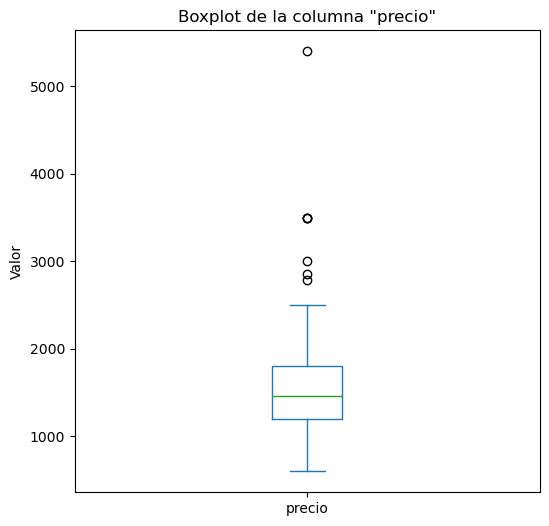

In [58]:
import matplotlib.pyplot as plt

columna = 'precio'

df1[columna].plot(kind='box', figsize=(6, 6))

plt.title(f'Boxplot de la columna "{columna}"')
plt.ylabel('Valor')

plt.show()

In [44]:
from faker import Faker

import random

faker = Faker()

ratings = [random.randint(1, 5) for _ in range(len(alquiler))]

ratings

[4,
 2,
 1,
 3,
 1,
 3,
 3,
 1,
 2,
 4,
 4,
 2,
 3,
 3,
 5,
 1,
 3,
 3,
 2,
 2,
 5,
 2,
 2,
 4,
 5,
 3,
 4,
 1,
 2,
 1,
 2,
 3,
 4,
 2,
 4,
 2,
 3,
 3,
 1,
 4,
 4,
 1,
 3,
 2,
 3,
 2,
 2,
 1,
 5,
 5,
 5,
 1,
 3,
 1,
 3,
 3,
 5,
 2,
 2,
 4,
 5,
 1,
 1,
 1,
 3,
 3,
 2,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 1,
 4,
 3,
 5,
 2,
 3,
 3,
 4,
 3,
 3,
 4,
 3,
 2,
 4,
 3,
 4,
 1,
 4,
 3,
 4,
 4,
 4,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 4,
 3,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 4,
 4,
 5,
 1,
 3,
 2,
 2,
 4,
 1,
 1,
 2,
 3,
 2,
 2,
 4,
 3,
 5,
 1,
 3,
 2,
 2,
 4,
 5,
 3,
 4,
 4,
 2,
 5,
 5,
 4,
 4,
 4,
 1,
 2,
 3,
 1,
 5,
 1,
 5,
 4,
 3,
 4,
 2,
 2,
 1,
 1,
 4,
 5,
 5,
 5,
 3,
 2,
 3,
 3,
 5,
 2,
 4,
 3,
 4,
 5,
 2,
 5,
 5,
 4,
 2,
 2,
 3,
 4,
 2,
 1,
 1,
 4,
 4,
 2,
 2,
 3,
 4,
 5,
 1,
 5,
 2,
 2,
 2,
 3,
 2,
 5,
 4,
 5,
 5,
 5,
 2,
 1,
 1,
 5,
 3,
 3,
 2,
 3,
 3,
 2,
 1,
 1,
 4,
 5,
 4,
 5,
 3,
 4,
 3,
 1,
 1,
 5,
 5,
 3,
 4,
 5,
 3,
 5,
 4,
 2,
 3,
 2,
 2,
 4,
 1,
 3,
 3,
 5,
 1,
 5,
 4,
 3,
 2,
 4,
 2,
 1,
 2,
 3,


In [47]:
#alquiler['rating'] = ratings

In [48]:
alquiler

,descripcion,zona,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,zona_€/m2,rating
0,4,arganzuela,600.0,25,0,3,3,3,0,24.000000,21.037674,4
1,0,arganzuela,700.0,35,2,0,1,0,0,20.000000,21.037674,2
2,0,arganzuela,790.0,40,1,1,0,1,0,19.750000,21.037674,1
3,4,arganzuela,800.0,40,0,3,3,3,0,20.000000,21.037674,3
4,0,arganzuela,800.0,35,1,4,0,1,0,22.857143,21.037674,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,villaverde,1465.0,45,1,6,1,1,0,32.555556,15.340223,5
8178,3,villaverde,1475.0,64,2,5,1,1,0,23.046875,15.340223,4
8179,0,villaverde,1500.0,90,4,6,1,1,0,16.666667,15.340223,3
8180,0,villaverde,1895.0,80,2,0,1,1,0,23.687500,15.340223,3


In [51]:
.

SyntaxError: invalid syntax (1933637684.py, line 1)

In [27]:
alquiler.to_csv('alquiler_limp.csv', index=False)

In [28]:
mad_int.to_csv('mad_int_limp.csv', index=False)

In [29]:
mad_ext.to_csv('mad_ext_limp.csv', index=False)